# Baseline Model
## Topic Modeling LDA

In [1]:
import preprocess
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import joblib

In [2]:
data = preprocess.read_encrypted_data()
df = preprocess.reformat_data(data)

In [3]:
# vectorizer = TfidfVectorizer(lowercase = True, min_df = 10, max_df = 0.2, ngram_range=(1, 4), stop_words="english")
vectorizer = CountVectorizer(lowercase = True, min_df = 10, max_df = 0.2, stop_words="english", ngram_range=(1, 4))
Text_X = vectorizer.fit_transform(df["Event_Remarks_Text"])

In [4]:
lda = LatentDirichletAllocation(n_components=30, max_iter=100, learning_method='online', 
                                random_state=0, verbose=2, evaluate_every=1)

theta = lda.fit_transform(Text_X.A)

iteration: 1 of max_iter: 100, perplexity: 2057.4085
iteration: 2 of max_iter: 100, perplexity: 1302.2050
iteration: 3 of max_iter: 100, perplexity: 967.5409
iteration: 4 of max_iter: 100, perplexity: 799.4137
iteration: 5 of max_iter: 100, perplexity: 709.5227
iteration: 6 of max_iter: 100, perplexity: 659.9968
iteration: 7 of max_iter: 100, perplexity: 630.8100
iteration: 8 of max_iter: 100, perplexity: 612.8509
iteration: 9 of max_iter: 100, perplexity: 601.2757
iteration: 10 of max_iter: 100, perplexity: 593.7607
iteration: 11 of max_iter: 100, perplexity: 588.2255
iteration: 12 of max_iter: 100, perplexity: 584.0048
iteration: 13 of max_iter: 100, perplexity: 580.9729
iteration: 14 of max_iter: 100, perplexity: 578.3829
iteration: 15 of max_iter: 100, perplexity: 576.3607
iteration: 16 of max_iter: 100, perplexity: 574.8191
iteration: 17 of max_iter: 100, perplexity: 573.1889
iteration: 18 of max_iter: 100, perplexity: 571.7333
iteration: 19 of max_iter: 100, perplexity: 570.5756


In [5]:
beta = lda.components_/np.sum(lda.components_,axis=1,keepdims=True)
max_words = np.argsort(-beta, axis=1)[:,:15]
features = vectorizer.get_feature_names_out()

for i in range(lda.components_.shape[0]):
    print(f"topic: {i}")
    print(f"psuedo count: {lda.components_[i].sum()}")
    print([features[ind] for ind in max_words[i] if lda.components_[i, ind] >= 5])
    print('\n')

topic: 0
psuedo count: 85.37552416368533
['39', '08']


topic: 1
psuedo count: 147.37372817096053
['reviewed 9903', '9903', 'said']


topic: 2
psuedo count: 4522.9935797512735
['eco', 'said', 'stated', 'wanted', 'phone', 'event info', 'accept advised event info', 'advised event info', 'calling', 'asked', 'line', 'did', 'says', '911', 'non']


topic: 3
psuedo count: 34.905090668118035
[]


topic: 4
psuedo count: 79.75226146158373
['arrest', '32', '37']


topic: 5
psuedo count: 4095.8809077584183
['comp', 'veh', 'vehicle', 'says', 'phone', 'number', 'contact', 'report', 'hrs', 'today', 'plate', 'stolen', 'just', 'cancel', 'time']


topic: 6
psuedo count: 65.33518094007734
['transporting', 'transport']


topic: 7
psuedo count: 6297.057929999677
['miscellaneous', 'incident', 'scene', 'vehicle', 'changed', 'suspect', 'type', 'person', 'caller scene', 'chief', 'description', 'cad', 'chief complaint', 'type changed', 'event type']


topic: 8
psuedo count: 2035.9903900367312
['urgent', 'reques

## Number of topic fine tuning

In [6]:
# the range of topic numbers to test
topic_numbers = range(2, 21, 1)

# Fit LDA models and compute perplexity
perplexities = []
best_lda = None
best_theta = None
best_perplexity = np.inf

for n in topic_numbers:
    lda = LatentDirichletAllocation(n_components=n, max_iter=100, learning_method='online', 
                                    random_state=0, evaluate_every=1)
    theta = lda.fit_transform(Text_X.A)
    perplexities.append(lda.perplexity(Text_X))
    print(f"Number of topics: {n}, Perplexity: {lda.perplexity(Text_X)}")
    
    # pocket the best lda
    if lda.perplexity(Text_X) < best_perplexity:
        best_lda = lda
        best_theta = theta
        best_perplexity = lda.perplexity(Text_X)

Number of topics: 2, Perplexity: 651.3982405252888
Number of topics: 3, Perplexity: 579.4201157951262
Number of topics: 4, Perplexity: 564.4037335691593
Number of topics: 5, Perplexity: 557.8057880675454
Number of topics: 6, Perplexity: 561.3630226173086
Number of topics: 7, Perplexity: 559.61354312992
Number of topics: 8, Perplexity: 547.7718053269233
Number of topics: 9, Perplexity: 530.6759991338868
Number of topics: 10, Perplexity: 536.7089704244801
Number of topics: 11, Perplexity: 541.6066894382934
Number of topics: 12, Perplexity: 539.820311625946
Number of topics: 13, Perplexity: 547.3397152257271
Number of topics: 14, Perplexity: 542.957205360809
Number of topics: 15, Perplexity: 537.8737933701686
Number of topics: 16, Perplexity: 536.1757195900501
Number of topics: 17, Perplexity: 542.540445122378
Number of topics: 18, Perplexity: 531.1530946547681
Number of topics: 19, Perplexity: 534.7723252595276
Number of topics: 20, Perplexity: 549.7464161892306


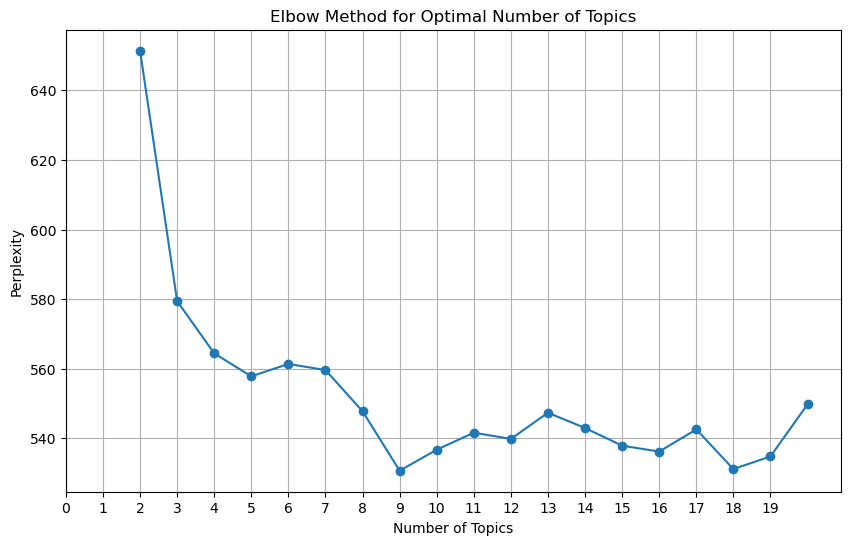

In [7]:
# Visualize the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(topic_numbers, perplexities, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.xticks(np.arange(0, 20, step=1))
plt.title('Elbow Method for Optimal Number of Topics')
plt.grid()
plt.show()

In [8]:
beta = best_lda.components_/np.sum(best_lda.components_,axis=1,keepdims=True)
max_words = np.argsort(-beta, axis=1)[:,:15]
features = vectorizer.get_feature_names_out()

for i in range(best_lda.components_.shape[0]):
    print(f"topic: {i}")
    print(f"psuedo count: {best_lda.components_[i].sum()}")
    print([features[ind] for ind in max_words[i] if best_lda.components_[i, ind] >= 5])
    print('\n')

topic: 0
psuedo count: 7664.575701409167
['domestic', 'disturbance', 'verbal', 'domestic disturbance', 'changed', 'involved', 'incident', 'miscellaneous', 'scene', 'ex', 'suspect', 'sentry', 'caller scene', 'verbal domestic', 'verbal domestic disturbance']


topic: 1
psuedo count: 2157.4526345576523
['access', 'area', 'access area', 'allow', 'cards', 'certain', 'event special', 'advised event special', 'event special address comment', 'advised event special address', 'event special address', 'accept advised event special', 'certain access', 'address comment restricted', 'access cards allow access']


topic: 2
psuedo count: 10305.656740739483
['eco', 'said', 'comp', 'phone', 'number', 'stated', 'calling', 'says', 'officer', 'wanted', 'report', 'contact', 'just', 'wants', 'time']


topic: 3
psuedo count: 767.4515850685127
['accept advised event special', 'advised event special address', 'event special address comment', 'event special', 'advised event special', 'event special address', 'c

# Dump the best model

In [9]:
# joblib.dump(best_theta, "data/best_theta.jl")
# joblib.dump(best_lda, "data/best_lda.jl")

In [10]:
# lda = joblib.load("data/best_lda.jl")
# theta = joblib.load("data/best_theta.jl")

# Pick appropriate topic labels

In [36]:
topic_dict = {"disturbance":0, "access area":1, "report contact": 2, "advised event":3, "miscellaneous":4, "vehicle":5, "number floors":6,
             "event type changed":7, "non urgent request":8}

for topic, topic_id in topic_dict.items():
    print(f"topic: {topic}")
    print(f"psuedo count: {best_lda.components_[topic_id].sum()}")
    print([features[ind] for ind in max_words[topic_id] if best_lda.components_[topic_id, ind] >= 5])
    print('\n')

topic: disturbance
psuedo count: 7664.575701409167
['domestic', 'disturbance', 'verbal', 'domestic disturbance', 'changed', 'involved', 'incident', 'miscellaneous', 'scene', 'ex', 'suspect', 'sentry', 'caller scene', 'verbal domestic', 'verbal domestic disturbance']


topic: access area
psuedo count: 2157.4526345576523
['access', 'area', 'access area', 'allow', 'cards', 'certain', 'event special', 'advised event special', 'event special address comment', 'advised event special address', 'event special address', 'accept advised event special', 'certain access', 'address comment restricted', 'access cards allow access']


topic: report contact
psuedo count: 10305.656740739483
['eco', 'said', 'comp', 'phone', 'number', 'stated', 'calling', 'says', 'officer', 'wanted', 'report', 'contact', 'just', 'wants', 'time']


topic: advised event
psuedo count: 767.4515850685127
['accept advised event special', 'advised event special address', 'event special address comment', 'event special', 'advise

# Document retreival by topic

In [37]:
from scipy.stats import zscore

def get_top_docs_by_topic(topic_list, n_docs):
    MIN_Z_SCORE = 2
    
    topic_set = set([topic_dict[t] for t in topic_list])
    matches = []  # (min() of zscores, post)

    for id, text, doc_vector in zip(df["Event_Anonymizer"], df["Event_Remarks_Text"], best_theta):
        
        zscores = zscore(doc_vector, axis=0)
        
        top_topics = np.where(zscores >= MIN_Z_SCORE)[0]
        
        if topic_set.issubset(set(top_topics)):
            matches.append((id, text, min(zscores[list(topic_set)])))
        
    matches.sort(reverse=True,key=lambda x: np.min(x[2]))

    return len(matches), [match[0] for match in matches[:n_docs]], [match[1] for match in matches[:n_docs]]

In [43]:
get_top_docs_by_topic(['report contact'], 5)

(284,
 [202423006704, 202423002551, 202423002132, 202423010338, 202423008122],
 ['9716',
  "THE SYSTEM HAS SABATOGED HIS LIFE FOR 10 YRS AND HE IS DISTURBED TO KNOW THAT THE SYSTEM IS METHODICALLY MAKING PEOPLE NUTS\nBECAUSE OF THAT TREATMENT HE NOW HAS PTSD\nHE IS LOUD AND AIGTATED TONIGHT FROM THE GET-GO\nNUMEROUS PEOPLE BEHIND THE SCENES HAVE BEEN RUINING HIS LIFE\nCO DID NOT IDENTIFY HIMSELF - ECO RECOGNIZES HIS [Redacted] AND STORY\nJUST ASKED IF IT'S [Redacted] AND HE SAID YES AND CHALLENGED ECO - ARE YOU GOING TO GIVE UP AND [Redacted] UP ON ME\nTHEN ASKED IF ECO IS GOING TO [Redacted] TO [Redacted] HIM 211\nHE IS OUTSIDE WALKING AROUND BECAUSE HE SAID HE CAN'T SLEEP BECAUSE HIS PTSD IS OUT OF CONTROL TONIGHT\nASKED HIM IF SOMETHING SPECIFIC HAPPENED AND WHAT HE'S DOING TONIGHT - HE CALMED MOMENTARILY, SAID SORRY FOR YELLING AND SAID HE'S OUT WALKING AND THEN WENT BACK INTO HIS STORY\nHE HAS WORKED HIMSELF INTO A STATE WHERE HE IS NOW SCREAMING AS LOUD AS HE CAN AND NOT RESPONDI